<a href="https://colab.research.google.com/github/Niel-Reitmann/Disease-Neural-Network/blob/main/Disease_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
from csv import reader
import numpy as np
import random
from operator import itemgetter
from matplotlib import pyplot as plt

In [ ]:
data = open ("/gdrive/My Drive/COVID-19-geographic-disbtribution-worldwide-2020-04-14 (2).csv")
data = list(reader(data, delimiter=','))
print (data)

[['\ufeffdateRep', 'day', 'month', 'year', 'cases', 'deaths', 'countriesAndTerritories', 'geoId', 'countryterritoryCode', 'popData2018'], ['14/04/2020', '14', '4', '2020', '58', '3', 'Afghanistan', 'AF', 'AFG', '37172386'], ['13/04/2020', '13', '4', '2020', '52', '0', 'Afghanistan', 'AF', 'AFG', '37172386'], ['12/04/2020', '12', '4', '2020', '34', '3', 'Afghanistan', 'AF', 'AFG', '37172386'], ['11/04/2020', '11', '4', '2020', '37', '0', 'Afghanistan', 'AF', 'AFG', '37172386'], ['10/04/2020', '10', '4', '2020', '61', '1', 'Afghanistan', 'AF', 'AFG', '37172386'], ['9/04/2020', '9', '4', '2020', '56', '3', 'Afghanistan', 'AF', 'AFG', '37172386'], ['8/04/2020', '8', '4', '2020', '30', '4', 'Afghanistan', 'AF', 'AFG', '37172386'], ['7/04/2020', '7', '4', '2020', '38', '0', 'Afghanistan', 'AF', 'AFG', '37172386'], ['6/04/2020', '6', '4', '2020', '29', '2', 'Afghanistan', 'AF', 'AFG', '37172386'], ['5/04/2020', '5', '4', '2020', '35', '1', 'Afghanistan', 'AF', 'AFG', '37172386'], ['4/04/2020'

In [ ]:
#0, 3, 7, 8, 9
for row in data:
  del row[8]
  del row[7]
  del row[3]
  del row[0]


In [ ]:
data = data[1:]

In [ ]:
countries =[]
ndata= []
for row in data:
  a = row[:4]
  a.append(row[5])
  if row[4] in countries:
    ndata[countries.index(row[4])].append(a)
  else:
    countries.append(row[4])
    ndata.append([a])

print(ndata)



[[['14', '4', '58', '3', '37172386'], ['13', '4', '52', '0', '37172386'], ['12', '4', '34', '3', '37172386'], ['11', '4', '37', '0', '37172386'], ['10', '4', '61', '1', '37172386'], ['9', '4', '56', '3', '37172386'], ['8', '4', '30', '4', '37172386'], ['7', '4', '38', '0', '37172386'], ['6', '4', '29', '2', '37172386'], ['5', '4', '35', '1', '37172386'], ['4', '4', '0', '0', '37172386'], ['3', '4', '43', '0', '37172386'], ['2', '4', '26', '0', '37172386'], ['1', '4', '25', '0', '37172386'], ['31', '3', '27', '0', '37172386'], ['30', '3', '8', '1', '37172386'], ['29', '3', '15', '1', '37172386'], ['28', '3', '16', '1', '37172386'], ['27', '3', '0', '0', '37172386'], ['26', '3', '33', '0', '37172386'], ['25', '3', '2', '0', '37172386'], ['24', '3', '6', '1', '37172386'], ['23', '3', '10', '0', '37172386'], ['22', '3', '0', '0', '37172386'], ['21', '3', '2', '0', '37172386'], ['20', '3', '0', '0', '37172386'], ['19', '3', '0', '0', '37172386'], ['18', '3', '1', '0', '37172386'], ['17', '3

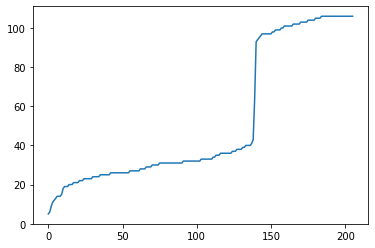

In [ ]:
how_much_data = []
for i in range(len(ndata)):
  how_much_data.append(len(ndata[i]))

plt.plot(sorted(how_much_data))
plt.show()

In [ ]:
if i in range (len(ndata)-1, -1, -1):
  if len(ndata[i]) < 80:
    del ndata[i]
    del countries [i]

print(len(ndata))

205


In [ ]:
def add(a):
  l = a.copy()
  for i in range(len(l)):
    if i != 0:
      l[i]=l[i]+l[i-1]
  return l


In [ ]:
def extract(country, column) :
  l =[]
  for i in country:
    l.append(int(i[column]))
  return l

In [ ]:
#Month between 1 and 12
#Day is between 1 and 31
#m*100+d
#Delete 1231 (dec 31st)

for country in ndata:
  for day in country:
    day.append(int(day[1])*100+int(day[0]))
    if day[-1] == 1231:
      del day





In [ ]:
for country in ndata:
  country.sort(key=itemgetter(5))


In [ ]:
mincase = 10000
sifted=[]
names=[]
for i in range(len(countries)):
  if max(add(extract(ndata[i], 2))) > mincase:
    names.append(countries[i])
    sifted.append(ndata[i])

print(names)
print(len(names))

['Austria', 'Belgium', 'Brazil', 'Canada', 'China', 'France', 'Germany', 'India', 'Iran', 'Ireland', 'Israel', 'Italy', 'Netherlands', 'Portugal', 'Russia', 'South_Korea', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'United_Kingdom', 'United_States_of_America']
22


Austria


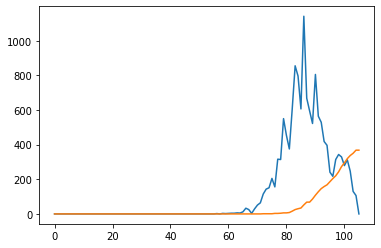

Belgium


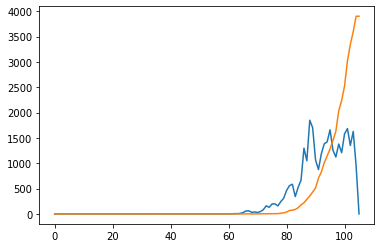

Brazil


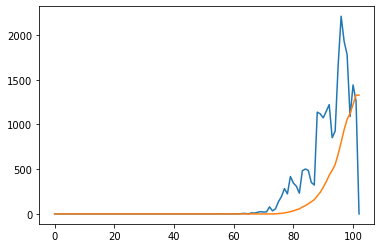

Canada


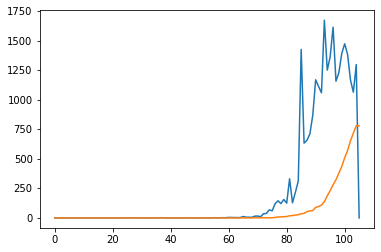

China


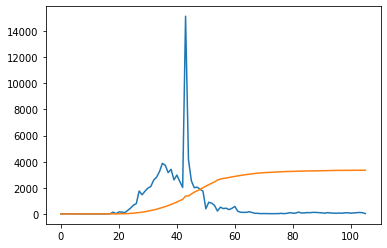

France


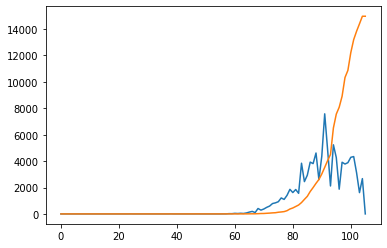

Germany


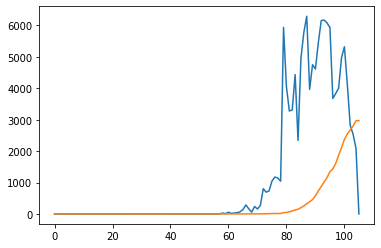

India


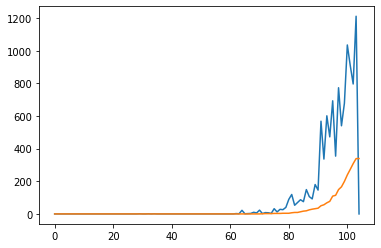

Iran


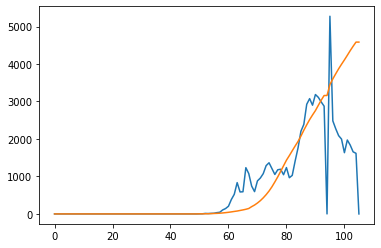

Ireland


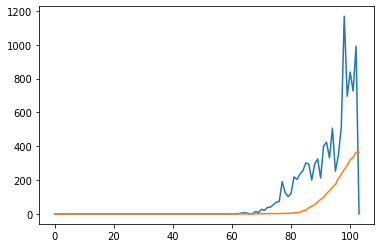

Israel


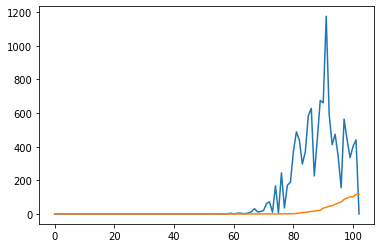

Italy


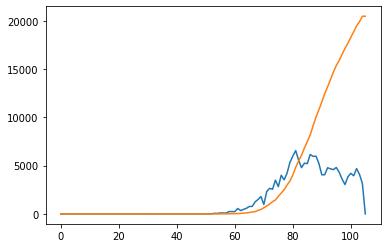

Netherlands


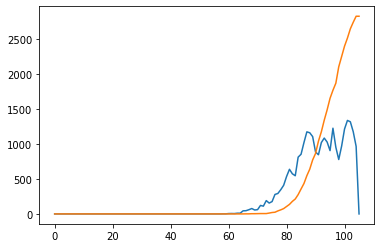

Portugal


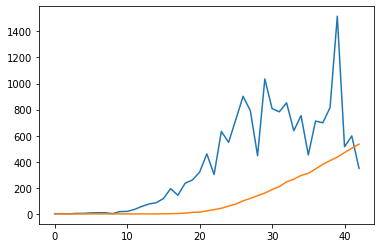

Russia


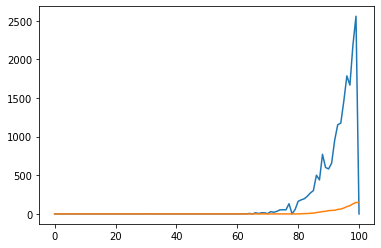

South_Korea


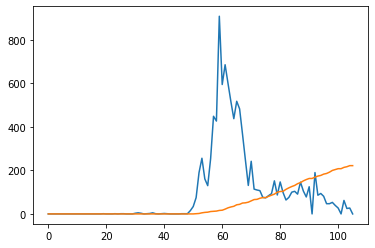

Spain


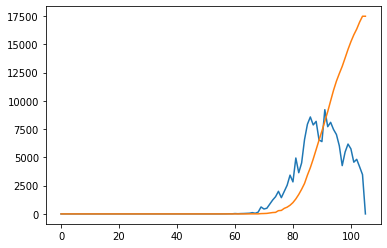

Sweden


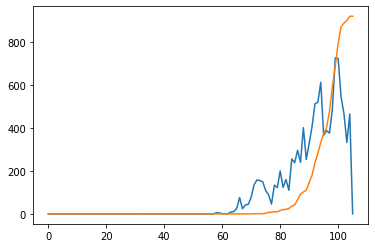

Switzerland


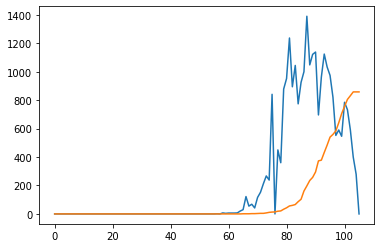

Turkey


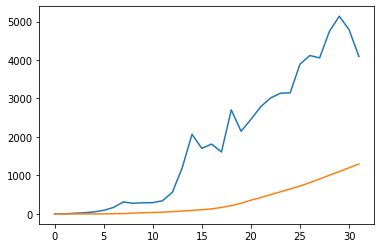

United_Kingdom


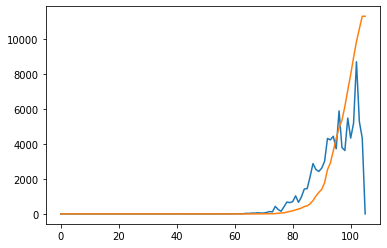

United_States_of_America


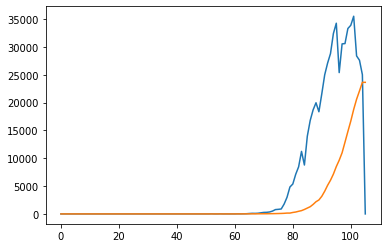

In [ ]:
for i in range(len(names)):
  print(names[i])
  plt.clf()
  plt.plot(extract(sifted[i], 2))
  plt.plot(add(extract(sifted[i], 3)))
  plt.show()

In [ ]:
korea = sifted[names.index("South_Korea")]
china = sifted[names.index("China")]
Australia = ndata[countries.index("Australia")]

In [ ]:
ycc = []
ycd = []
ykc = []
ykd = []
yac = []
yad = []
for i in range(len(china)):
  ycc.append(int(china[i][2])/int(china[i][4])*30000)
  ycd.append(int(china[i][3])/int(china[i][4])*3000000)
  ykc.append(int(korea[i][2])/int(korea[i][4])*30000)
  ykd.append(int(korea[i][3])/int(korea[i][4])*3000000)
  yac.append(int(Australia[i][2])/int(Australia[i][4])*30000)
  yad.append(int(Australia[i][3])/int(Australia[i][4])*3000000)

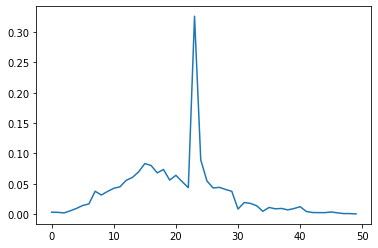

In [ ]:
ycc = ycc[20:70]
ycd = ycd[20:70]
plt.plot(ycc)
plt.show()



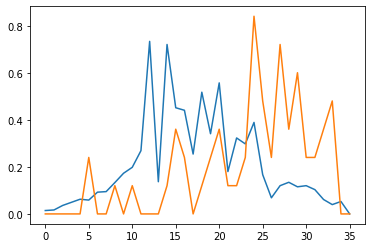

In [ ]:
yac = yac[70:]
yad = yad[70:]
plt.plot(yac)
plt.plot(yad)
plt.show()


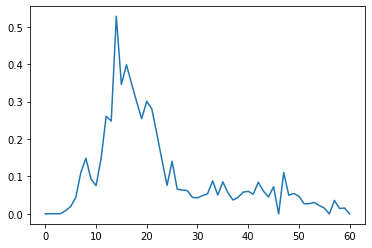

In [ ]:
ykc = ykc[45:]
ykd = ykd[45:]
plt.plot(ykc)
plt.show()

In [ ]:
def dataset(cases, deaths, population, num):
  xnew = []
  ynew = []
  for i in range(len(cases)-num):
    temp = []
    for a in range(num):
      temp.append(cases[i+a])
      temp.append(deaths[i+a])
    temp.append(int(population)/200000000)
    xnew.append(temp)
    ynew.append([cases[i+num], deaths[i+num]])

  return xnew, ynew

In [ ]:
dataset(yac, yad, int(Australia[0][4]), 13)[0]

[[0.014404396798078646,
  0.0,
  0.01680512959775842,
  0.0,
  0.03601099199519661,
  0.0,
  0.04921502239343537,
  0.0,
  0.06241905279167413,
  0.0,
  0.05881795359215448,
  0.24007327996797742,
  0.09242821278767131,
  0.0,
  0.09482894558735108,
  0.0,
  0.13324067038222748,
  0.12003663998398871,
  0.17285276157694374,
  0.0,
  0.19806045597358138,
  0.12003663998398871,
  0.26888207356413474,
  0.0,
  0.733423870302171,
  0.0,
  0.124961845],
 [0.01680512959775842,
  0.0,
  0.03601099199519661,
  0.0,
  0.04921502239343537,
  0.0,
  0.06241905279167413,
  0.0,
  0.05881795359215448,
  0.24007327996797742,
  0.09242821278767131,
  0.0,
  0.09482894558735108,
  0.0,
  0.13324067038222748,
  0.12003663998398871,
  0.17285276157694374,
  0.0,
  0.19806045597358138,
  0.12003663998398871,
  0.26888207356413474,
  0.0,
  0.733423870302171,
  0.0,
  0.13684176958174715,
  0.0,
  0.124961845],
 [0.03601099199519661,
  0.0,
  0.04921502239343537,
  0.0,
  0.06241905279167413,
  0.0,
  0.0

In [ ]:
def data():
  xc, yc = dataset(ycc,ycd, china[0][4], 13)
  xk, yk = dataset(ykc,ykd, korea[0][4], 13)
  xa, ya = dataset(yac,yad, Australia[0][4], 13)
  x = xc+xk
  y = yc+yk
  temp = list(zip(x, y))
  random.shuffle(temp)
  x, y = zip(*temp)
  xtrain = x[:-18]
  ytrain = y[:-18]
  xtest = x[-18:]
  ytest = y[-18:]
  assert xtrain+xtest==x and ytrain+ytest==y
  return xtrain, xtest, ytrain, ytest

xtrain, xtest, ytrain, ytest = data()



In [ ]:
from tensorflow import keras

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(units=27, input_shape=(27,), activation="relu"))
model.add(keras.layers.Dense(units=64, activation="relu"))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(units=128, activation="relu"))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(units=128, activation="relu"))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(units=64, activation="relu"))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(units=2, activation="relu"))
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.1), loss="mean_squared_error")


In [ ]:
model.fit(
    x = xtrain,
    y = ytrain,
    batch_size = 5,
    epochs=1000

)

Epoch 1/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.0423
Epoch 2/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0456
Epoch 3/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0332
Epoch 4/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0231
Epoch 5/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0215
Epoch 6/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0160
Epoch 7/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0165
Epoch 8/1000
14/14 [==============================] - 0s 2ms/step - loss: 0.0191
Epoch 9/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0181
Epoch 10/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0160
Epoch 11/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0152
Epoch 12/1000
14/14 [==============================] - 0s 1ms/step - loss: 0.0140
Epoch 13/1000
14/14 [====

In [ ]:
def visualize(model, infec, kill, name, reali, realkill, population, offset):
  for con in range(len(name)):
    infected = infec[con].copy()
    dead = kill[con].copy()
    temp = []
    for i in range(len(infected)):
      temp.append(infected[i])
      temp.append(dead[i])

    temp.append(population[con]/200000000)
    for _ in range(offset[con]):
      infected.insert(0,0)
      dead.insert(0,0)
    for i in range(100):
      p = model.predict(np.array([temp]))
      temp.pop(1)
      temp.pop(0)

      popu = temp.pop(-1)

      temp.append(p[0][0])
      temp.append(p[0][1])

      temp.append(popu)


      infected.append(p[0][0])
      dead.append(p[0][1])

    print(name[con])
    print("infected")
    plt.plot(infected, "r-")
    plt.plot(reali[con], "b--")
    plt.plot(infected[offset[con]:13+offset[con]], "k-")

    plt.show()


    print(name[con])
    print("dead")
    plt.plot(dead, "r-")
    plt.plot(realkill[con], "b--")
    plt.plot(dead[offset[con]:13+offset[con]], "k-")

    plt.show()

China
infected


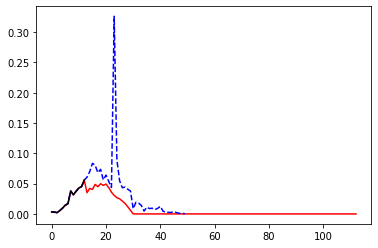

China
dead


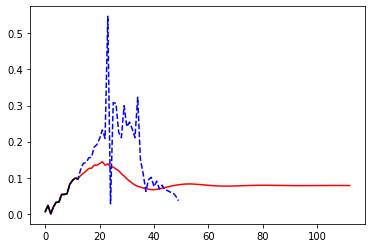

South Korea
infected


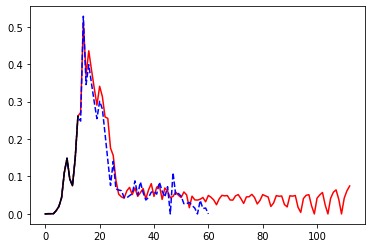

South Korea
dead


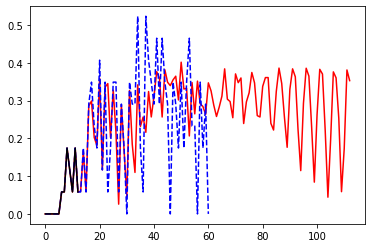

Australia
infected


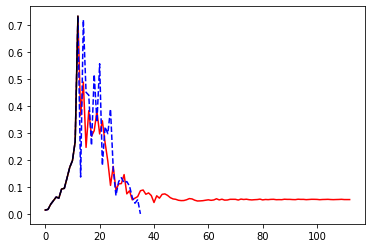

Australia
dead


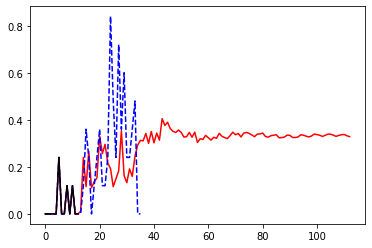

In [ ]:
visualize(model, [ycc[:13], ykc[:13], yac[:13]],
          [ycd[:13], ykd[:13], yad[:13]],
          ["China","South Korea","Australia"],
          [ycc, ykc, yac],
          [ycd,ykd, yad],
          [int(china[0][4]),int(korea[0][4]),int(Australia[0][4])],
          [0, 0, 0])